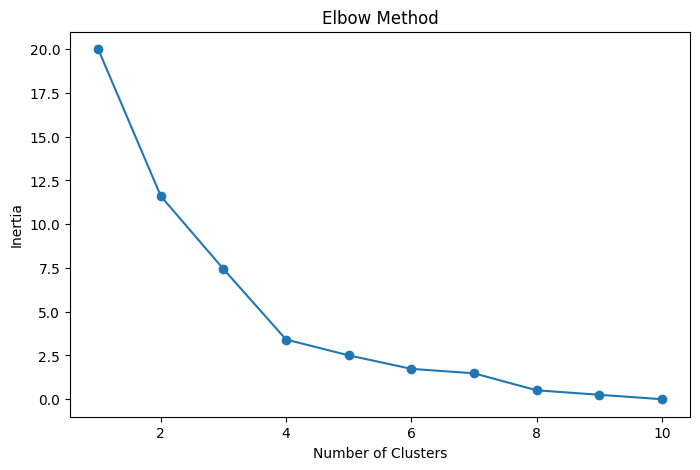

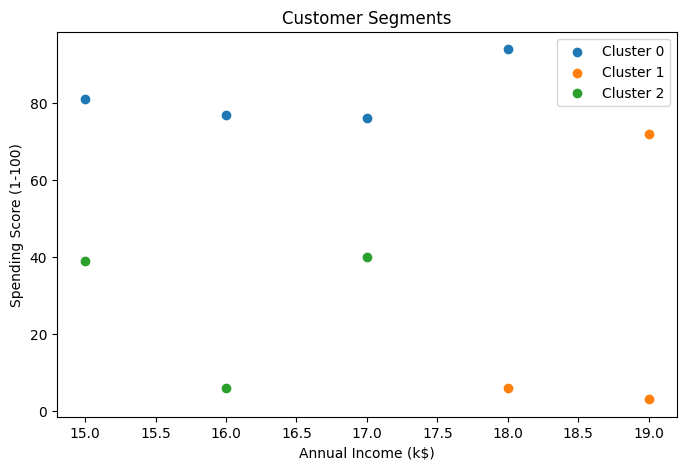

Clustered data saved to 'Mall_Customers_Clustered.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Create or Load the Dataset
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Gender": ["Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female", "Male", "Female"],
    "Age": [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
    "Annual Income (k$)": [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
    "Spending Score (1-100)": [39, 81, 6, 77, 40, 76, 6, 94, 3, 72],
}

df = pd.DataFrame(data)

# Step 2: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the Optimal Number of Clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Apply K-means Clustering
optimal_clusters = 3  # Choose based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Step 6: Visualize the Clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Step 7: Save the Clustered Data
df.to_csv('Mall_Customers_Clustered.csv', index=False)
print("Clustered data saved to 'Mall_Customers_Clustered.csv'")